<a href="https://colab.research.google.com/github/Jihen-Boukhadhra/NY_Housing_Data_Analysis/blob/main/kmeans_apr%C3%A8s_Nettoyage_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importation des données
import pandas
NYHouse = pandas.read_csv("NYHouseNUM.csv")
print(NYHouse)

        PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0      315000     2     2   1400.000000  40.761255 -73.974483
1      260000     4     2   2015.000000  40.541805 -74.196109
2       69000     3     1    445.000000  40.761398 -73.974613
3      690000     5     2   4004.000000  40.674363 -73.958725
4      899500     2     2   2184.207862  40.809448 -73.946777
..        ...   ...   ...           ...        ...        ...
486  16500000     5     4   4105.000000  40.781460 -73.980686
487    695000     3     3   1793.000000  40.576391 -74.163138
488  16500000     5     4   4105.000000  40.781460 -73.980686
489    695000     3     3   1793.000000  40.576391 -74.163138
490    998000     5     3   1738.000000  40.689803 -73.836542

[491 rows x 6 columns]


(491, 6)
              PRICE        BEDS        BATH  PROPERTYSQFT    LATITUDE  \
count  4.910000e+02  491.000000  491.000000    491.000000  491.000000   
mean   1.462076e+06    3.513238    2.417515   1994.904722   40.701378   
std    2.812773e+06    2.109582    1.383141   1100.392303    0.096632   
min    2.494000e+03    1.000000    1.000000    230.000000   40.501623   
25%    4.194440e+05    2.000000    1.000000   1219.000000   40.621128   
50%    7.990000e+05    3.000000    2.000000   2184.207862   40.696727   
75%    1.299894e+06    4.000000    3.000000   2184.207862   40.773544   
max    3.100000e+07   15.000000   10.000000   9026.000000   40.907370   

        LONGITUDE  
count  491.000000  
mean   -73.950822  
std      0.118412  
min    -74.246109  
25%    -74.001426  
50%    -73.945506  
75%    -73.858125  
max    -73.712559  


array([[<Axes: xlabel='PRICE', ylabel='PRICE'>,
        <Axes: xlabel='BEDS', ylabel='PRICE'>,
        <Axes: xlabel='BATH', ylabel='PRICE'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>,
        <Axes: xlabel='LATITUDE', ylabel='PRICE'>,
        <Axes: xlabel='LONGITUDE', ylabel='PRICE'>],
       [<Axes: xlabel='PRICE', ylabel='BEDS'>,
        <Axes: xlabel='BEDS', ylabel='BEDS'>,
        <Axes: xlabel='BATH', ylabel='BEDS'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='BEDS'>,
        <Axes: xlabel='LATITUDE', ylabel='BEDS'>,
        <Axes: xlabel='LONGITUDE', ylabel='BEDS'>],
       [<Axes: xlabel='PRICE', ylabel='BATH'>,
        <Axes: xlabel='BEDS', ylabel='BATH'>,
        <Axes: xlabel='BATH', ylabel='BATH'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='BATH'>,
        <Axes: xlabel='LATITUDE', ylabel='BATH'>,
        <Axes: xlabel='LONGITUDE', ylabel='BATH'>],
       [<Axes: xlabel='PRICE', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='BEDS', ylabel='PROPERTYSQFT'>,


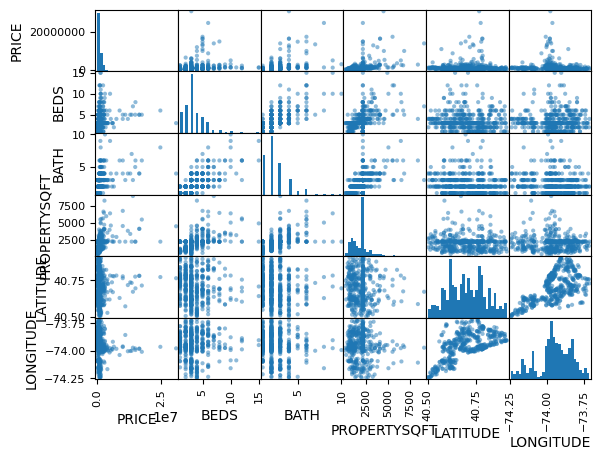

In [ ]:
#dimension des données
print(NYHouse.shape)
#statistiques descriptives
print(NYHouse.describe())
#graphique croisement deux à deux des variables
#from pandas.tools.plotting import scatter_matrix
pandas.plotting.scatter_matrix(NYHouse,hist_kwds={'bins':30})

In [ ]:
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
NYHouse_cr = sc.fit_transform(NYHouse)

In [ ]:
#k-means
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(NYHouse_cr)

#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
Cldf=pandas.DataFrame(NYHouse.index[idk],kmeans.labels_[idk])
print(Cldf)
#distances aux centres de classes des observations
A=kmeans.transform(NYHouse_cr)
print(A)
print(pandas.DataFrame({'Classe':kmeans.labels_+1,'ID':NYHouse.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2]}))
#print(pandas.DataFrame({'Classe':kmeans.labels_+1,'ID':X.index,'Fonction':Tab.Fonction}))

#print(Tab.Fonction[idk])
#ACP
from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(NYHouse)

      0
0     0
0   301
0   300
0   297
0   295
..  ...
2   285
2   385
2   383
2    54
2    91

[491 rows x 1 columns]
[[0.95257981 4.46661434 2.22818467]
 [3.40471199 4.51233047 1.10503858]
 [1.58028972 5.14556738 2.65768448]
 ...
 [6.2537734  4.13294321 6.53333395]
 [3.01272316 4.17868931 0.67599797]
 [1.43372135 3.29307798 2.65413371]]
     Classe   ID    DistG1    DistG2    DistG3
0         1    0  0.952580  4.466614  2.228185
1         3    1  3.404712  4.512330  1.105039
2         1    2  1.580290  5.145567  2.657684
3         1    3  2.460526  3.022787  2.687183
4         1    4  1.015956  4.169130  2.748480
..      ...  ...       ...       ...       ...
486       2  486  6.253773  4.132943  6.533334
487       3  487  3.012723  4.178689  0.675998
488       2  488  6.253773  4.132943  6.533334
489       3  489  3.012723  4.178689  0.675998
490       1  490  1.433721  3.293078  2.654134

[491 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(NYHouse_cr)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pandas.DataFrame(NYHouse.index[idk],kmeans.labels_[idk]))
#distances aux centres de classes des observations
A=kmeans.transform(NYHouse_cr)
print(pandas.DataFrame({'Classe':kmeans.labels_,'ID':NYHouse.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2],'DistG4':A[:,3]}))
#print(kmeans.transform(NYHouse_cr))

      0
0     0
0   295
0   294
0   292
0   290
..  ...
3    83
3    78
3   355
3   121
3   114

[491 rows x 1 columns]
     Classe   ID    DistG1    DistG2    DistG3    DistG4
0         0    0  0.844557  3.507121  2.284232  6.353753
1         2    1  3.386021  3.929693  1.053279  6.574006
2         0    2  1.465346  4.118605  2.720115  6.959051
3         1    3  2.581713  2.121369  2.705779  5.620870
4         0    4  1.016481  3.265061  2.795478  6.010881
..      ...  ...       ...       ...       ...       ...
486       3  486  6.344471  5.433249  6.529421  1.016457
487       2  487  2.993256  3.635749  0.603331  6.194025
488       3  488  6.344471  5.433249  6.529421  1.016457
489       2  489  2.993256  3.635749  0.603331  6.194025
490       0  490  1.585543  2.119901  2.710703  5.755819

[491 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

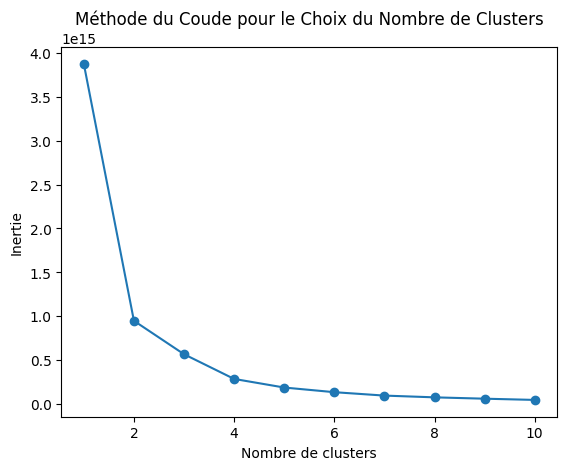

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcul de l'inertie pour différents nombres de clusters
inertias = []
for i in range(1, 11):  # Tester pour un nombre de clusters de 1 à 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(NYHouse.values)
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title('Méthode du Coude pour le Choix du Nombre de Clusters')
plt.show()

In [ ]:
# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(NYHouse_cr)

# Ajout des informations de clusters aux données
NYHouse['cluster'] = clusters

# Calcul des moyennes des caractéristiques de chaque cluster
cluster_means = NYHouse.groupby('cluster').mean()
print("Moyennes des caractéristiques de chaque cluster :")
print(cluster_means)

# Calcul des différences significatives entre les clusters
cluster_diff = cluster_means.diff().iloc[1:]  # Différences par rapport au premier cluster
print("\nDifférences significatives entre les clusters :")
print(cluster_diff)

# Caractéristiques les plus discriminantes pour chaque cluster
print("\nCaractéristiques les plus discriminantes pour chaque cluster :")
for i, row in cluster_diff.iterrows():
    print(f"Cluster {i}:")
    max_diff_feature = row.idxmax()
    max_diff_value = row.max()
    print(f"Caractéristique la plus discriminante: {max_diff_feature}, Différence: {max_diff_value}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Moyennes des caractéristiques de chaque cluster :
                PRICE      BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
cluster                                                                      
0        9.451380e+05  2.987138  1.938907   1745.318941  40.747108 -73.889544
1        5.735776e+06  7.214286  5.000000   3854.980537  40.701013 -73.959481
2        8.285313e+05  3.161290  2.451613   1780.847725  40.586848 -74.100602

Différences significatives entre les clusters :
                PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
cluster                                                                     
1        4.790638e+06  4.227147  3.061093   2109.661596 -0.046094  -0.069938
2       -4.907245e+06 -4.052995 -2.548387  -2074.132812 -0.114166  -0.141120

Caractéristiques les plus discriminantes pour chaque cluster :
Cluster 1:
Caractéristique la plus discriminante: PRICE, Différence: 4790637.865698208
Cluster 2:
Caractéristique la plus discriminante: LA

In [ ]:
# Filtrer les données pour ne sélectionner que les individus du cluster 3
cluster_3_data = NYHouse[NYHouse['cluster'] == 3]

# Afficher les informations sur les individus du cluster 3
print("Individus constituant le cluster 3 :")
print(cluster_3_data)

Individus constituant le cluster 3 :
        PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  cluster
3    55000000     7     3       14175.0  40.767224 -73.969856        2
6    16800000     8    16       33000.0  40.595002 -74.106424        2
68   65000000     3     3       15200.0  40.776561 -73.963317        2
98   55000000     8     8       12000.0  40.782238 -73.984632        2
140  56000000    11    10       24000.0  40.761600 -73.976191        2
180  39995000     4     3       10582.0  40.716422 -74.010120        2
221  29200000    12    10       11638.0  40.747472 -73.979679        2


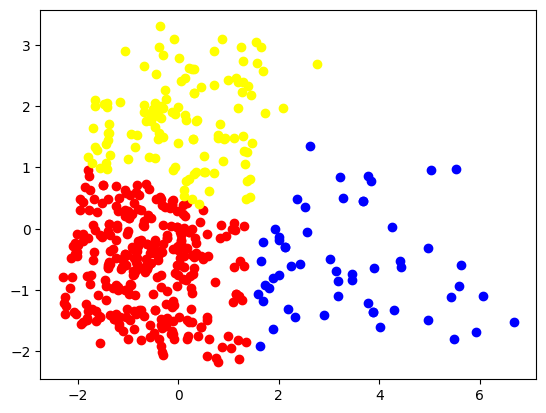

In [ ]:
from sklearn.decomposition import PCA
acp = PCA(n_components = 2).fit_transform(NYHouse_cr)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
for couleur,k in zip(['red', 'blue','yellow'],[0,1,2]):
  plt.scatter(acp[kmeans.labels_==k,0], acp[kmeans.labels_==k,1],c= couleur)
plt.show()